In [1]:
import numpy as np
import pandas as pd
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer



%matplotlib inline

In [2]:
# Load Data from pickle
with open('../business.pkl', 'rb') as pickle_in: # 'rb' read byte
    business = pickle.load(pickle_in)
with open('../reviews.pkl', 'rb') as pickle_in: # 'rb' read byte
    reviews = pickle.load(pickle_in)
with open('../checkin.pkl', 'rb') as pickle_in: # 'rb' read byte
    checkin = pickle.load(pickle_in)
with open('../tip.pkl', 'rb') as pickle_in: # 'rb' read byte
    tip = pickle.load(pickle_in)

In [3]:
business.head()

,business_id,name,city,state,postal_code,latitude,longitude,business_stars,review_count,is_open,attributes,categories,hours
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
26,hcRxdDg7DYryCxCoI8ySQA,Longwood Galleria,Boston,MA,02215,42.338544,-71.106842,2.5,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'..."
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,Boston,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
35,iPD8BBvea6YldQZPHzVrSQ,Espresso Minute,Boston,MA,02115,42.342673,-71.084239,4.5,7,0,"{'NoiseLevel': ''quiet'', 'GoodForKids': 'True...","Creperies, Restaurants, Food, Coffee & Tea, Br...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0..."
54,Z2JC3Yrz82kyS86zEVJG5A,Gigi's Roast Beef & Pizza,Burlington,MA,01803,42.506935,-71.195854,3.0,16,0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Restaurants, Sandwiches, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [9]:
business.shape

(10480, 13)

In [4]:
reviews.head()

,user_id,business_id,stars,text,date,year,month
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,2014,10
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,2015,7
2,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,2013,5
3,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,2010,1
4,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,The food is always great here. The service fro...,2011-07-28 18:05:01,2011,7


In [10]:
reviews.shape

(8635403, 7)

In [5]:
checkin.head()

,business_id,n_checkins
0,--0r8K_AQ4FZfLsX3ZYRDA,1
1,--0zrn43LEaB4jUWTQH_Bg,9
2,--164t1nclzzmca7eDiJMw,311
3,--2aF9NhXnNVpDV0KS3xBQ,8
4,--2mEJ63SC_8_08_jGgVIg,4


In [12]:
checkin.shape

(138876, 2)

In [6]:
tip.head()

,user_id,business_id,tip,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


In [13]:
tip.shape

(1162119, 5)

In [14]:
# Rename column names 
reviews.rename(columns={'stars': 'reviews_stars'}, inplace=True)

In [17]:
df = business.merge(checkin, 'left', on='business_id')
df.shape

(10480, 14)

In [9]:
# Merge business and reviews datasets into one
business_reviews = business.merge(reviews, 'inner', on='business_id')
business_reviews = business_reviews.merge(tip, 'inner', on='business_id')
business_reviews = business_reviews.merge(checkin, 'inner', on='business_id')
business_reviews.head()

,business_id,name,city,state,postal_code,latitude,longitude,business_stars,review_count,is_open,...,reviews_stars,text,date_x,year,month,user_id_y,tip,date_y,compliment_count,n_checkins
0,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,...,4.0,Pizza here is delicious. I tried it once a few...,2016-03-07 17:58:53,2016,3,BzS5iUHr_M9fYar_iwfx4w,Homemade bread is out of this world,2014-03-15 17:16:33,0,36
1,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,...,4.0,Pizza here is delicious. I tried it once a few...,2016-03-07 17:58:53,2016,3,7lZcVVhqp6UCDLPKT7D2sg,"So as I'm sitting here, I love the decor! Look...",2013-04-27 23:57:33,0,36
2,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,...,4.0,Pizza here is delicious. I tried it once a few...,2016-03-07 17:58:53,2016,3,n6LKHLBr4y4NAs8sUUN1zA,Don't use the bathroom. They keep the cornmeal...,2014-06-07 03:26:32,0,36
3,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,...,4.0,Pizza here is delicious. I tried it once a few...,2016-03-07 17:58:53,2016,3,iYJoqK_B1GKvDNv6tc5Arg,The pizza here is delicious! My favorite in th...,2012-08-07 00:11:51,0,36
4,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,...,4.0,love this place! really good pizza and probabl...,2010-01-10 17:33:51,2010,1,BzS5iUHr_M9fYar_iwfx4w,Homemade bread is out of this world,2014-03-15 17:16:33,0,36


In [10]:
business_reviews.isnull().sum()

business_id               0
name                      0
city                      0
state                     0
postal_code               0
latitude                  0
longitude                 0
business_stars            0
review_count              0
is_open                   0
attributes                0
categories                0
hours               1459673
user_id_x                 0
reviews_stars             0
text                      0
date_x                    0
year                      0
month                     0
user_id_y                 0
tip                       0
date_y                    0
compliment_count          0
n_checkins                0
dtype: int64

In [ ]:
# Drop 'hours' column, and duplicate columns
business_reviews.drop(axis=1, columns=['hours', 'date_x', 'user_id_x', 'user_id_y', 'date_y'])

In [ ]:
# Binarize the categories column
mlb = MultiLabelBinarizer()
categories_df = pd.DataFrame(mlb.fit_transform(business_reviews['categories'].str.split(',')),columns=mlb.classes_, index=business_reviews.index)

In [55]:
pd.DataFrame(mlb.fit_transform(business_reviews['attributes'].str.split(',')),columns=mlb.classes_, index=business_reviews.index)

TypeError: 'float' object is not iterable

# EDA

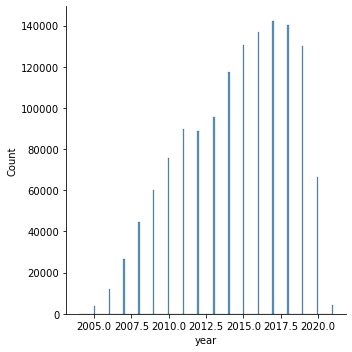

In [23]:
sns.displot(business_reviews['year'], )

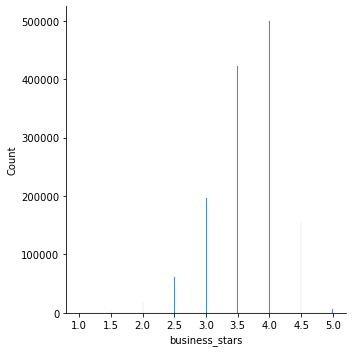

In [31]:
sns.displot(business_reviews['business_stars'] )